# <center> Assignment 1 </center>

#### Name: Yousef EL-Qawasmi

##### Student ID: 190615960

### You are given a list of target values of a binary classification problem, and 2 lists of corresponding predicted scores from 2 models (Model_1 and Model_2). Please evaluate the preformance of the models in the following aspects. You are allowed to use python machine learning packages, such as sklearn.

In [11]:
### Read the target values and predicted scores into lists
def read_from_file(filename):
    file = open(filename, "r") 
    s = file.read()
    lines = s.split('\n')
    return [float(x) for x in lines]

target = read_from_file('target.csv')
pred_1 = read_from_file('pred_model1.csv')
pred_2 = read_from_file('pred_model2.csv')


### Question 1. Assume the target level 1 is positive, and 0 is negative. Given a threshold 0.2, show the confusion matrix for each model.

In [12]:
from sklearn.metrics import confusion_matrix

def threshold(arr):
    new_arr = []
    for i in range(len(arr)):
        if arr[i] > 0.2:
            new_arr.append(1)
        else:
            new_arr.append(0)
    return new_arr

pred1 = threshold(pred_1)
pred2 = threshold(pred_2)

mtrx1 = confusion_matrix(target, pred1, labels=[1,0])
mtrx2 = confusion_matrix(target, pred2, labels=[1,0])

print("Model 1 confusion matrix: \n",mtrx1)
print("Model 2 confusion matrix: \n",mtrx2)

Model 1 confusion matrix: 
 [[ 764  208]
 [  76 1617]]
Model 2 confusion matrix: 
 [[ 809  163]
 [ 408 1285]]


### Question 2. For each model, what are the following values? TPR, FPR, TNR, FNR, Precision, Recall, F1-measure.

In [13]:
TP1, FN1, FP1, TN1 = mtrx1.ravel()
TP2, FN2, FP2, TN2 = mtrx2.ravel()

#model 1 var
TPR1 = TP1/(TP1+FN1)
FPR1 = FP1/(FP1+TN1)
FNR1 = FN1/(TP1+FN1)
TNR1 = TN1/(TN1+FP1)
precision1 = TP1/(TP1+FP1)
recall1 = TP1/(TP1+FN1)
f11 = (2*TP1)/((2*TP1)+FP1+FN1)

#model 2 var
TPR2 = TP2/(TP2+FN2)
FPR2 = FP2/(FP2+TN2)
FNR2 = FN2/(TP2+FN2)
TNR2 = TN2/(TN2+FP2)
precision2 = TP2/(TP2+FP2)
recall2 = TP2/(TP2+FN2)
f12 = (2*TP2)/((2*TP2)+FP2+FN2)


print("(TPR,FPR,FNR,TNR), Precision, Recall, F1-Score for Model 1: \n")
print("TPR: ",TPR1,"\nFPR: ",FPR1,"\nFNR: ",FNR1,"\nTNR: ",TNR1,"\nPrecision: ", precision1,"\nRecall: " ,recall1,"\nF1-Score:", f11)

print("\n(TPR,FPR,FNR,TNR), Precision, Recall, F1-Score for Model 2: \n")
print("TPR: ",TPR2,"\nFPR: ",FPR2,"\nFNR: ",FNR2,"\nTNR: ",TNR2,"\nPrecision: ", precision2,"\nRecall: " ,recall2,"\nF1-Score:", f12)

(TPR,FPR,FNR,TNR), Precision, Recall, F1-Score for Model 1: 

TPR:  0.7860082304526749 
FPR:  0.0448907265209687 
FNR:  0.2139917695473251 
TNR:  0.9551092734790313 
Precision:  0.9095238095238095 
Recall:  0.7860082304526749 
F1-Score: 0.8432671081677704

(TPR,FPR,FNR,TNR), Precision, Recall, F1-Score for Model 2: 

TPR:  0.8323045267489712 
FPR:  0.2409923213230951 
FNR:  0.16769547325102882 
TNR:  0.7590076786769049 
Precision:  0.6647493837304848 
Recall:  0.8323045267489712 
F1-Score: 0.7391502969392416


### Question 3. Draw ROC curves of the two models. 

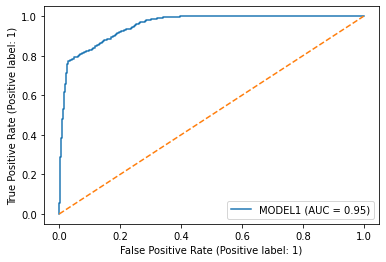

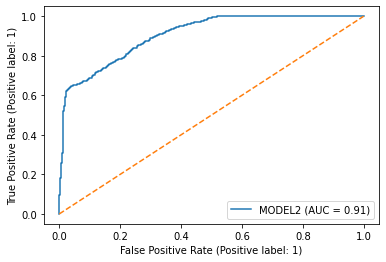

In [14]:
import sklearn
import matplotlib.pyplot as plt

sklearn.metrics.RocCurveDisplay.from_predictions(target, pred_1, name="MODEL1")
plt.plot([0,1],[0,1],'--')
sklearn.metrics.RocCurveDisplay.from_predictions(target, pred_2, name="MODEL2")
plt.plot([0,1],[0,1],'--')

### Question 4. For each model, what is the value of the ROC Index? Which model has better performance according to ROC Index? 

In [15]:
print("ROC index model1: ",sklearn.metrics.roc_auc_score(target, pred_1))
print("\nROC index model2: ",sklearn.metrics.roc_auc_score(target, pred_2))
print("\nThe greater the ROC score the better the performance therefore model 1 is better")

ROC index model1:  0.9540634517828191

ROC index model2:  0.9060273602998551

The greater the ROC score the better the performance therefore model 1 is better
